EDA PROJECT = CHURN DATA ANALYSIS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv("Customer Churn.csv",encoding='utf-8',na_values=['not available','unkown','error'])
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Preprocessing the data

In [4]:
# Now we convert our columns data types for more better EDA.

Catgory_col=['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
df[Catgory_col]=df[Catgory_col].astype('category')

# df["TotalCharges"] = df["TotalCharges"].astype("float")

In [5]:
# convert the senior citizen column values

df['SeniorCitizen']=df['SeniorCitizen'].map({1:"Yes",0:"No"})

In [6]:
df.isnull().sum()    #checking the null values in data.

(df==' ').sum()        #checking the blank values in data.
# We found that Total Charges values have some blank values let's convert them into 0.
df['TotalCharges']=df['TotalCharges'].replace(' ','0') 

df.duplicated().sum()   # checking the duplicate values in data.
df.duplicated(['customerID']).sum()     #checking if their any duplicate values in customerID.







np.int64(0)

Exploratory Data Analysis.

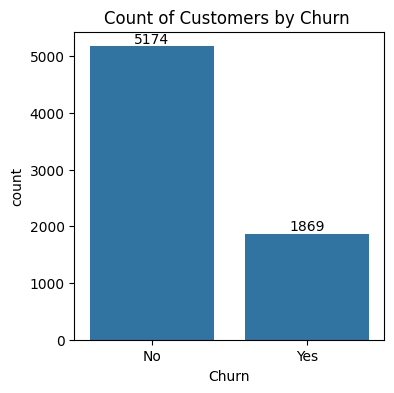

In [7]:
# Count of Customers By churn.

plt.figure(figsize=(4,4))                   # to set the size of chart(width,column)
ax=sns.countplot(x='Churn',data=df)
plt.title("Count of Customers by Churn ")   #title for the chart.
ax.bar_label(ax.containers[0])              #data labels 

plt.show()

C:\Users\Anshul Sharma\AppData\Local\Temp\ipykernel_17976\2325606476.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gb=df.groupby('Churn').agg(CustomerCount=('Churn',"count"))


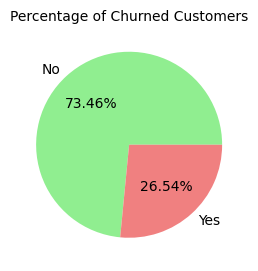

In [8]:
# percentage of customers by churn


# let's group by the churn column to show its percentage in piechart.
gb=df.groupby('Churn').agg(CustomerCount=('Churn',"count"))

colors=['lightgreen','lightcoral']
plt.figure(figsize=(3,4))

# now we perform the building a pie chart.
plt.pie(gb['CustomerCount'],labels=gb.index,autopct="%1.2f%%",colors=colors)
plt.title("Percentage of Churned Customers",fontsize=10)
plt.show()

From the above pie chart we get that 26.54% of customers are churned out.
Now let's find the reasons behind it.

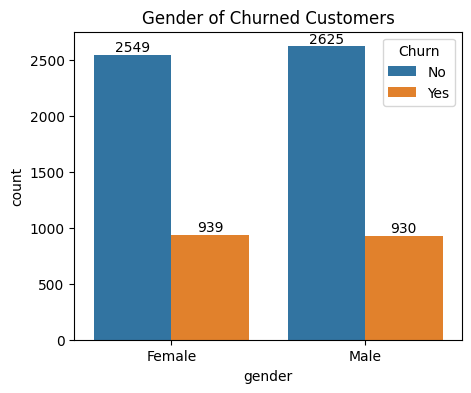

In [9]:
# Now let's chech the number of churned customers divided in gender category.
plt.figure(figsize=(5,4))
gen_Churn=sns.countplot(data=df,x='gender',hue='Churn')     #pie chart 
for container in gen_Churn.containers:                      #labels for pie chart.
    gen_Churn.bar_label(container,label_type='edge')
plt.title("Gender of Churned Customers")

plt.show()

From the above chart we can conclude that female customers are churned out most.

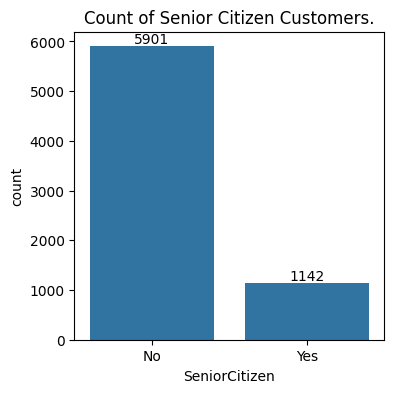

In [10]:
# Now Let's find the senior citizen customers count.
plt.figure(figsize=(4,4))
sc=sns.countplot(x='SeniorCitizen',data=df)
plt.title("Count of Senior Citizen Customers.")
sc.bar_label(sc.containers[0])

plt.show()

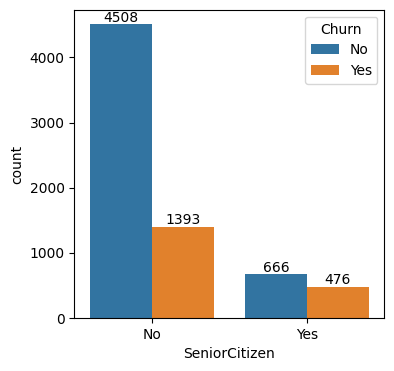

In [11]:
# Now Let's Find count of customers who churnd out on tha basis of senior citizen category.
plt.figure(figsize=(4,4))
sc_Churn=sns.countplot(x='SeniorCitizen',hue='Churn',data=df)
for container in sc_Churn.containers:
    sc_Churn.bar_label(container,label_type='edge')



From above chart we can say that customers who are not senior citizens are churned out the most.

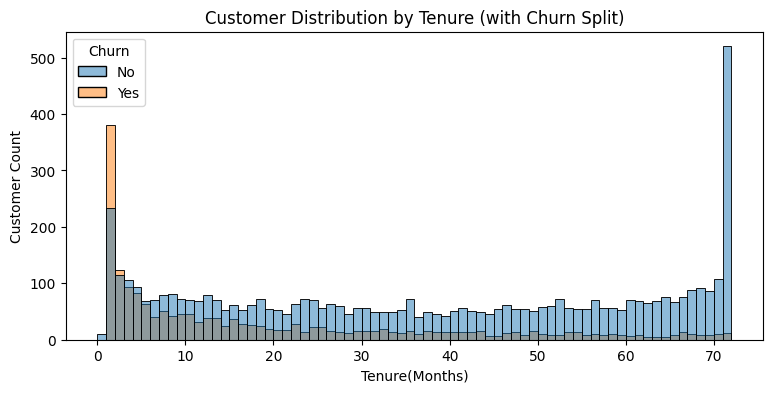

In [17]:
# Now we find the Customer's Count on the basis of tenure who churned out the most.

plt.figure(figsize=(9,4))
tg=sns.histplot(data=df,x='tenure',hue='Churn',bins=72)
plt.title("Customer Distribution by Tenure (with Churn Split)")
plt.xlabel("Tenure(Months)")
plt.ylabel("Customer Count")
plt.show()


From above chart we can conclude that the customers in inital tenure mostly 1 month have churned out the most and the customers who used the services for long are stayed.

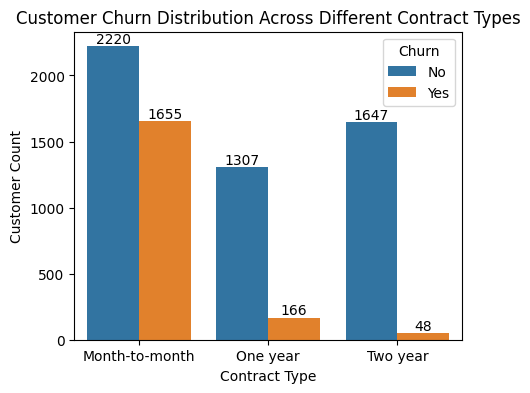

In [31]:
# Now let's find the customers count who churned out on the basis of contract.
plt.figure(figsize=(5,4))
sc=sns.countplot(data=df,x='Contract',hue='Churn',)
for container in sc.containers:
    sc.bar_label(container,label_type='edge')

plt.title("Customer Churn Distribution Across Different Contract Types")
plt.xlabel("Contract Type")
plt.ylabel("Customer Count")
plt.show()



From the above Chart we conclude that customers who chooses the month-to-month contract are churned out the most.

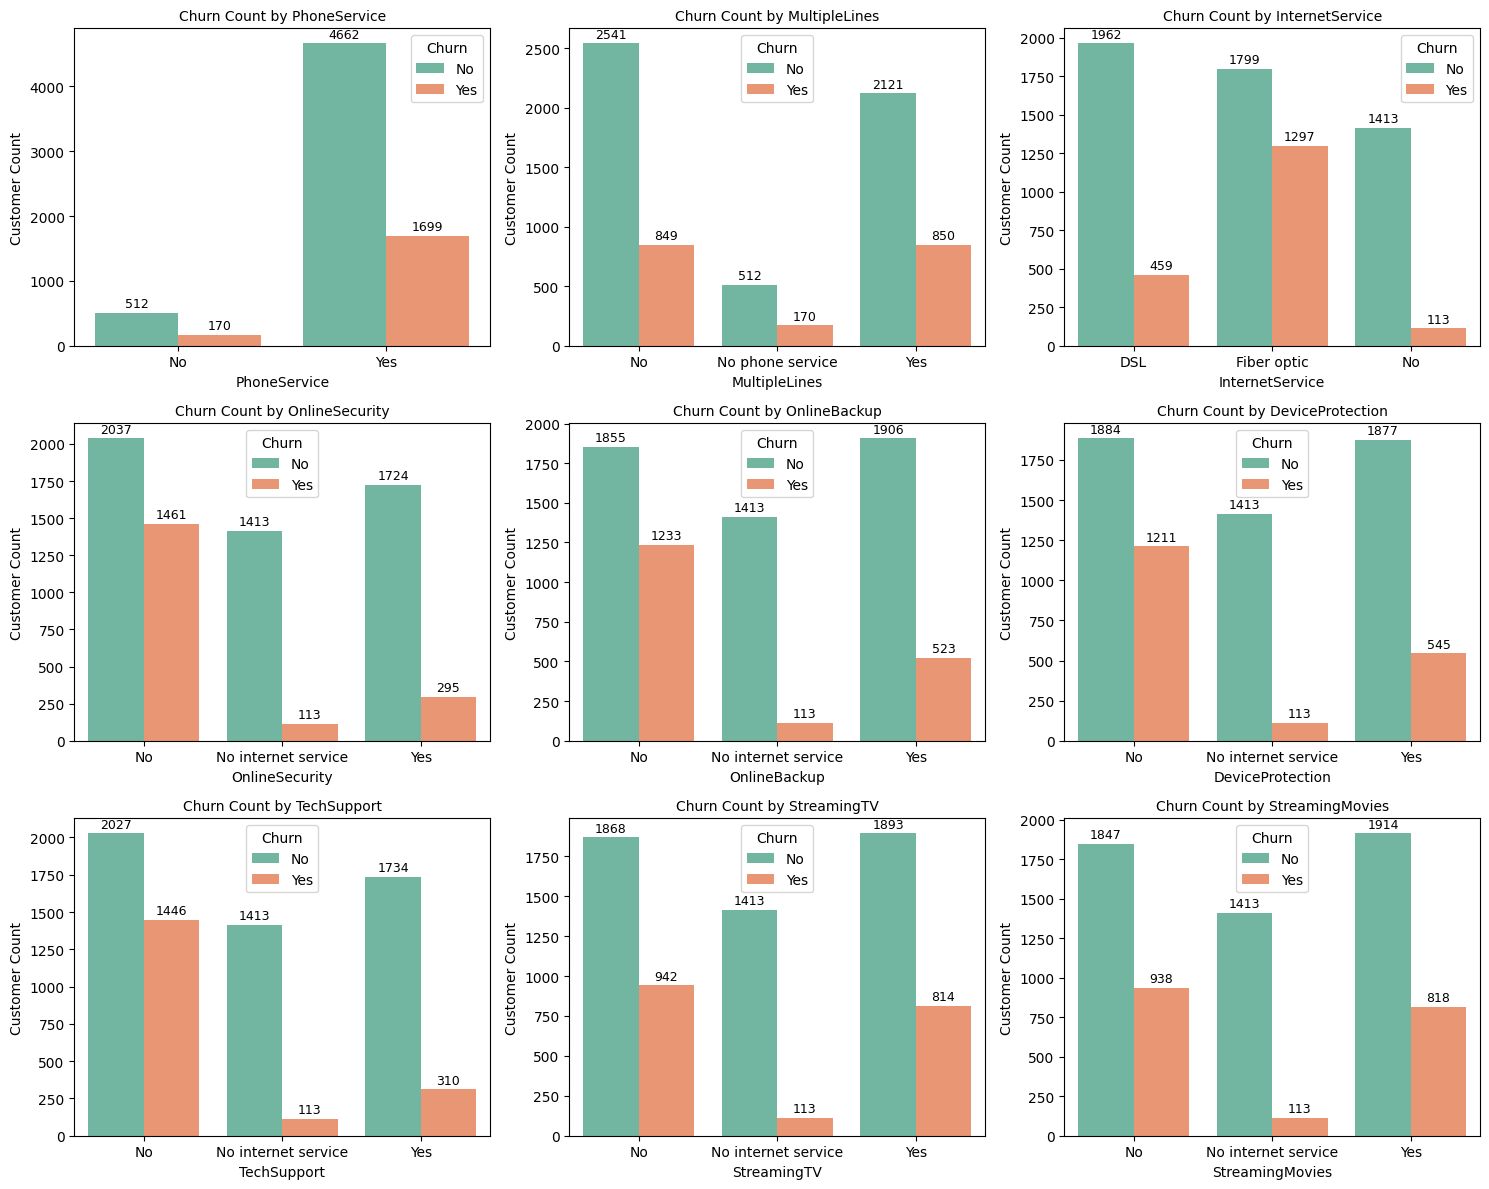

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of service-related columns
columns = [
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Set number of columns and rows for the subplot grid
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols

# Create subplots with appropriate figure size
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

# Loop through each column and plot the countplot
for i, col in enumerate(columns):
    ax = axes[i]

    # Create the countplot
    plot = sns.countplot(data=df, x=col, hue='Churn', ax=ax, palette='Set2')

    # Set title and labels
    ax.set_title(f'Churn Count by {col}', fontsize=10)
    ax.set_xlabel(col)
    ax.set_ylabel('Customer Count')
    # Add bar labels (count on top of each bar)
    for container in ax.containers:
        ax.bar_label(container, label_type='edge', padding=2, fontsize=9)

# Remove any unused subplot axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


The majority of customers who do not churn tend to have services like PhoneService, InternetService (particularly DSL), and OnlineSecurity enabled. For services like OnlineBackup, TechSupport, and StreamingTV, churn rates are noticeably higher when these services are not used or are unavailable.

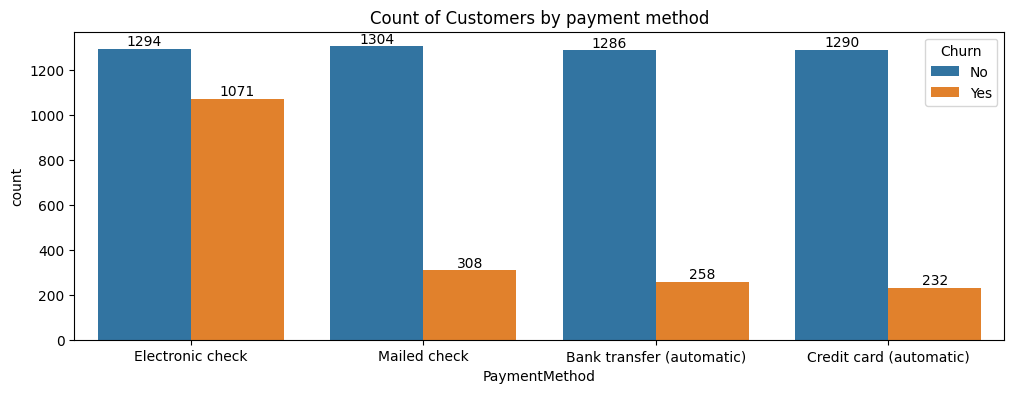

In [ ]:
plt.figure(figsize = (12,4))
pm= sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")
for container in pm.containers:
    pm.bar_label(container,label_type='edge')
plt.title("Count of Customers by payment method")
plt.show()

From above chart we can conclude that customer is likely to churn when he is using electronic check as a payment method.